#### Goodwin Oscillator
Negative feedback loop:
*G1 product activates G2; G2 product activates G3; G3 product represses G1* \
\
$\frac{\ dG_1}{\ dt} = [\frac{\ c^n}{\ c^n + G_3^n}]k_1 - \gamma_1 G_1$\
\
$\frac{\ dG_2}{\ dt} = [\frac{\ G_1^n}{\ c^n + G_1^n}]k_2 - \gamma_2 G_2$\
\
$\frac{\ dG_3}{\ dt} = [\frac{\ G_2^n}{\ c^n + G_2^n}]k_3 - \gamma_3 G_3$\
\
**where**, \
$\frac{\ dG_1}{\ dt}$ - rate of change gene 1 product \
$\frac{\ dG_2}{\ dt}$ - rate of change gene 2 product \
$\frac{\ dG_2}{\ dt}$ - rate of change gene 3 product \
$k_1$ - rate of synthesis of protein 1 \
$k_2$ - rate of synthesis of protein 2 \
$k_3$ - rate of synthesis of protein 3 \
$\gamma_1$ - rate of degradation of protein 1 \
$\gamma_2$ - rate of degradation of protein 2 \
$\gamma_3$ - rate of degradation of protein 3 \
$G1$ - concentration of protein 1 \
$G2$ - concentration of protein 2 \
$G3$ - concentration of protein 3 \
$c$ - activation coefficient \
$n$ - Hill coefficient

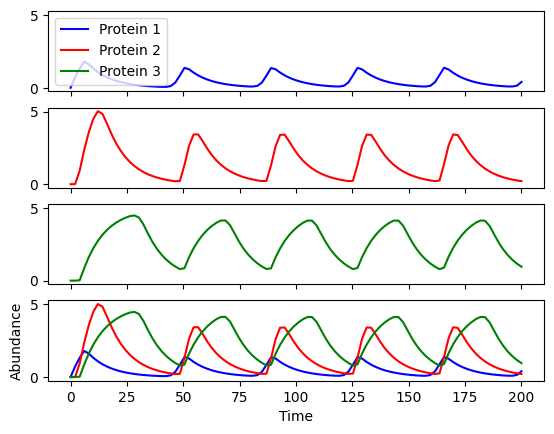

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

y0 = [0,0,0] #0 protein1, 0 protein2, 0 protein3

t = np.linspace(0,200,num=100)

k_1 = 0.4
gamma_1 = 0.1
k_2 = 0.9
gamma_2 = 0.1
k_3 = 0.5
gamma_3 = 0.1
n = 9
c = 1


par = [k_1, gamma_1, k_2, gamma_2, k_3, gamma_3, n, c] # parameters for ODE solver

def sim(vars, t, par):
    G1 = vars[0]
    G2 = vars[1]
    G3 = vars[2]

    k_1 = par[0]
    gamma_1 = par[1]
    k_2 = par[2]
    gamma_2 = par[3]
    k_3 = par[4]
    gamma_3 = par[5]
    n = par[6]
    c = par[7]

    dG1dt = k_1*(c**n/(c**n + G3**n)) - gamma_1*G1
    dG2dt = k_2*(G1**n/(c**n + G1**n)) - gamma_2*G2
    dG3dt = k_3*(G2**n/(c**n + G2**n)) - gamma_3*G3

    return ([dG1dt,dG2dt,dG3dt])

y = odeint(sim, y0, t, args = (par,))

f,(ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)

g1, = ax1.plot(t, y[:, 0], 'b', label="Protein 1")
g2, = ax2.plot(t, y[:, 1], 'r', label="Protein 2")
g3, = ax3.plot(t, y[:, 2], 'g', label="Protein 3")
ax4.plot(t, y[:, 0], 'b')
ax4.plot(t, y[:, 1], 'r')
ax4.plot(t, y[:, 2], 'g')

ax4.set_xlabel('Time')
ax4.set_ylabel('Abundance')

ax1.legend(handles=[g1,g2,g3])

plt.show()